# Projectile Trajectories for Different Shapes

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lookbusy1344/Relativity/blob/main/Python/Projectile%20Trajectories.ipynb)


This notebook demonstrates how air resistance affects the trajectory of projectiles with different shapes. We'll compare various objects including humans in different orientations, all launched at the same initial speed and angle to see how their drag coefficients and surface areas influence their flight paths.

## Advanced Physics Modeling

This notebook uses a sophisticated ballistics library featuring:
- **Reynolds number-dependent drag**: Drag coefficients change dynamically based on velocity
- **ISA atmospheric model**: Realistic air density and temperature variation with altitude
- **Variable gravity**: Gravitational acceleration decreases with altitude
- **Temperature-dependent viscosity**: Air viscosity calculated using Sutherland's formula

In [70]:
import os

# Download the ballistics library if running on Google Colab
if not os.path.exists("ballistics_lib.py"):
    !wget -q https://raw.githubusercontent.com/lookbusy1344/Relativity/main/Python/ballistics_lib.py

import numpy as np
import matplotlib.pyplot as plt
from ballistics_lib import projectile_distance3

# Configure matplotlib for better plots
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

## Launch Parameters

All projectiles will be launched with identical initial conditions to isolate the effect of shape, mass, and surface area on trajectory.

In [71]:
# =============================================================================
# LAUNCH PARAMETERS - Clearly defined for easy modification
# =============================================================================

LAUNCH_SPEED = 100.0  # Initial velocity in m/s
LAUNCH_ANGLE = 45.0  # Launch angle in degrees

# Note: Mass and surface area will vary by projectile type for realistic comparison
# Base parameters for non-human projectiles:
BASE_MASS = 5.0  # Mass in kg for mechanical projectiles
BASE_SURFACE_AREA = 0.05  # Cross-sectional area in m² for mechanical projectiles

# Human parameters:
HUMAN_MASS = 70.0  # Average human mass in kg

# Display the parameters clearly
print("=" * 50)
print("PROJECTILE LAUNCH PARAMETERS")
print("=" * 50)
print(f"Initial Speed:    {LAUNCH_SPEED:.1f} m/s")
print(f"Launch Angle:     {LAUNCH_ANGLE:.1f}°")
print(f"Base Mass (objects): {BASE_MASS:.1f} kg")
print(f"Base Surface Area:   {BASE_SURFACE_AREA:.3f} m²")
print(f"Human Mass:          {HUMAN_MASS:.1f} kg")
print("=" * 50)

PROJECTILE LAUNCH PARAMETERS
Initial Speed:    100.0 m/s
Launch Angle:     45.0°
Base Mass (objects): 5.0 kg
Base Surface Area:   0.050 m²
Human Mass:          70.0 kg


## Projectile Definitions

Different shapes and orientations have different drag coefficients and surface areas, which significantly affect their aerodynamic properties. We'll compare mechanical objects with humans in different orientations.

In [72]:
# Define the projectiles we want to compare
projectiles = {
    "sphere": {
        "shape": "sphere",
        "mass": BASE_MASS,
        "area": BASE_SURFACE_AREA,
        "description": "Sports ball",
    },
    "streamlined": {
        "shape": "streamlined",
        "mass": BASE_MASS,
        "area": BASE_SURFACE_AREA,
        "description": "Aerodynamic projectile",
    },
    "human_head_first": {
        "shape": "human_prone",
        "mass": HUMAN_MASS,
        "area": 0.18,  # Head-first: head/shoulders ~18cm x 35cm = 0.18 m²
        "description": "Human diving head-first",
    },
    "human_spread_eagle": {
        "shape": "human_standing",
        "mass": HUMAN_MASS,
        "area": 0.7,  # Full frontal area: ~1.7m x 0.4m = 0.7 m²
        "description": "Human spread-eagle",
    },
}

# Color scheme for the plots
colors = ["blue", "green", "red", "orange"]

# Display projectile properties
drag_coefficients = {
    "sphere": 0.47,
    "streamlined": 0.04,
    "human_prone": 0.7,  # Head-first, streamlined body
    "human_standing": 1.2,  # Full frontal area
}

print("\nPROJECTILE PROPERTIES:")
print("=" * 60)
for name, proj in projectiles.items():
    cd = drag_coefficients[proj["shape"]]
    print(
        f"{proj['description']:25}: Mass={proj['mass']:4.0f}kg, Area={proj['area']:5.2f}m², Cd={cd:.2f}"
    )


PROJECTILE PROPERTIES:
Sports ball              : Mass=   5kg, Area= 0.05m², Cd=0.47
Aerodynamic projectile   : Mass=   5kg, Area= 0.05m², Cd=0.04
Human diving head-first  : Mass=  70kg, Area= 0.18m², Cd=0.70
Human spread-eagle       : Mass=  70kg, Area= 0.70m², Cd=1.20


## Calculate Trajectories

Now we'll calculate the complete trajectory for each shape using our enhanced ballistics library with realistic atmospheric modeling:

- **Reynolds-dependent drag coefficients**: Cd varies with velocity throughout flight
- **ISA atmospheric model**: Temperature and density change with altitude  
- **Variable gravity**: Gravitational acceleration decreases with altitude
- **Temperature-dependent viscosity**: Air viscosity varies with temperature using Sutherland's formula

In [73]:
# Calculate trajectories for all shapes
trajectories = {}
distances = {}

print("Calculating trajectories...\n")

for name, proj in projectiles.items():
    # Get trajectory data with 200 points for smooth plotting
    # Using altitude_model=True for realistic atmospheric and gravity effects
    trajectory = projectile_distance3(
        speed=LAUNCH_SPEED,
        angle_deg=LAUNCH_ANGLE,
        mass=proj["mass"],
        surface_area=proj["area"],
        shape=proj["shape"],
        altitude_model=True,
        return_trajectory=True,
        n_points=200,
    )

    trajectories[name] = trajectory
    distances[name] = trajectory["distance"]

    # Display results
    print(
        f"{proj['description']:25}: Distance = {trajectory['distance']:6.1f} m, "
        f"Flight time = {trajectory['t'][-1]:5.2f} s, "
        f"Max height = {max(trajectory['y']):5.1f} m"
    )

# Calculate vacuum trajectory for comparison
import math

angle_rad = math.radians(LAUNCH_ANGLE)
vacuum_distance = LAUNCH_SPEED**2 * math.sin(2 * angle_rad) / 9.81
vacuum_time = 2 * LAUNCH_SPEED * math.sin(angle_rad) / 9.81
vacuum_height = (LAUNCH_SPEED * math.sin(angle_rad)) ** 2 / (2 * 9.81)

print(
    f"\n{'Vacuum (no air)':25}: Distance = {vacuum_distance:6.1f} m, "
    f"Flight time = {vacuum_time:5.2f} s, "
    f"Max height = {vacuum_height:5.1f} m"
)

Calculating trajectories...

Sports ball              : Distance =  704.3 m, Flight time = 12.92 s, Max height = 205.7 m
Aerodynamic projectile   : Distance =  858.6 m, Flight time = 13.73 s, Max height = 231.5 m
Human diving head-first  : Distance =  575.8 m, Flight time = 12.10 s, Max height = 181.1 m
Human spread-eagle       : Distance =  199.9 m, Flight time =  8.14 s, Max height =  84.0 m

Vacuum (no air)          : Distance = 1019.4 m, Flight time = 14.42 s, Max height = 254.8 m


## Trajectory Comparison Plot

Let's visualize how different shapes affect the projectile trajectory.

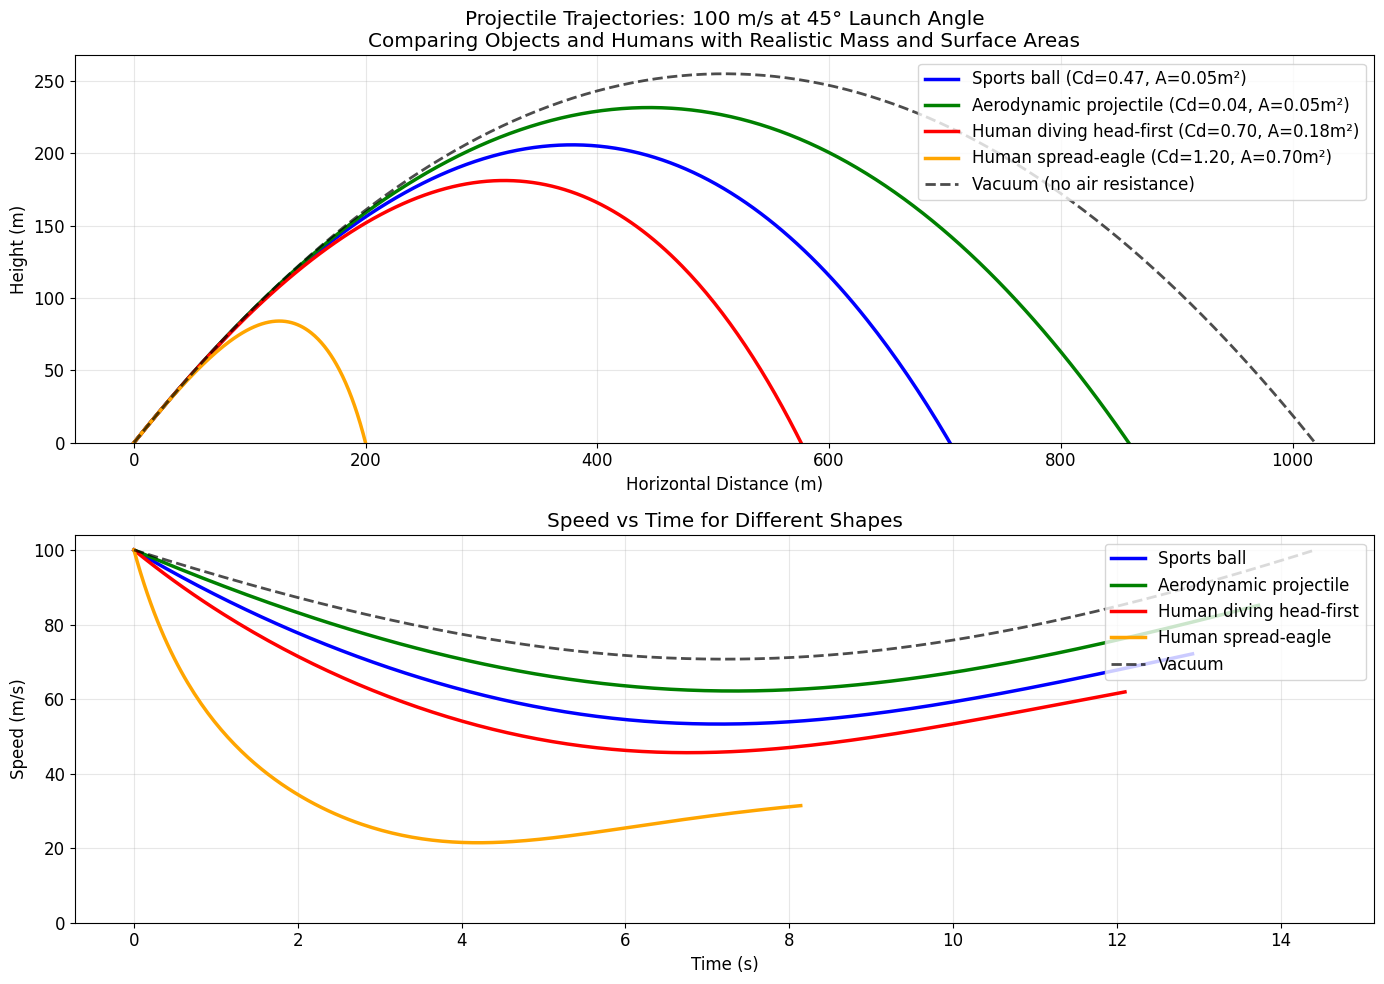

In [74]:
# Create the main trajectory plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Full trajectories
for i, (name, proj) in enumerate(projectiles.items()):
    traj = trajectories[name]
    cd = drag_coefficients[proj["shape"]]
    ax1.plot(
        traj["x"],
        traj["y"],
        color=colors[i],
        linewidth=2.5,
        label=f"{proj['description']} (Cd={cd:.2f}, A={proj['area']:.2f}m²)",
    )

# Add vacuum trajectory for reference
t_vacuum = np.linspace(0, vacuum_time, 200)
x_vacuum = LAUNCH_SPEED * math.cos(angle_rad) * t_vacuum
y_vacuum = LAUNCH_SPEED * math.sin(angle_rad) * t_vacuum - 0.5 * 9.81 * t_vacuum**2
ax1.plot(
    x_vacuum,
    y_vacuum,
    "k--",
    linewidth=2,
    alpha=0.7,
    label="Vacuum (no air resistance)",
)

ax1.set_xlabel("Horizontal Distance (m)")
ax1.set_ylabel("Height (m)")
ax1.set_title(
    f"Projectile Trajectories: {LAUNCH_SPEED:.0f} m/s at {LAUNCH_ANGLE:.0f}° Launch Angle\n"
    f"Comparing Objects and Humans with Realistic Mass and Surface Areas"
)
ax1.grid(True, alpha=0.3)
ax1.legend(loc="upper right")
ax1.set_ylim(bottom=0)

# Plot 2: Speed vs time
for i, (name, proj) in enumerate(projectiles.items()):
    traj = trajectories[name]
    ax2.plot(
        traj["t"],
        traj["speed"],
        color=colors[i],
        linewidth=2.5,
        label=f"{proj['description']}",
    )

# Add vacuum speed for reference (constant horizontal, changing vertical)
v_vacuum = np.sqrt(
    (LAUNCH_SPEED * math.cos(angle_rad)) ** 2
    + (LAUNCH_SPEED * math.sin(angle_rad) - 9.81 * t_vacuum) ** 2
)
ax2.plot(t_vacuum, v_vacuum, "k--", linewidth=2, alpha=0.7, label="Vacuum")

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Speed (m/s)")
ax2.set_title("Speed vs Time for Different Shapes")
ax2.grid(True, alpha=0.3)
ax2.legend(loc="upper right")
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

## Distance Comparison

Let's create a bar chart to clearly show the range differences.

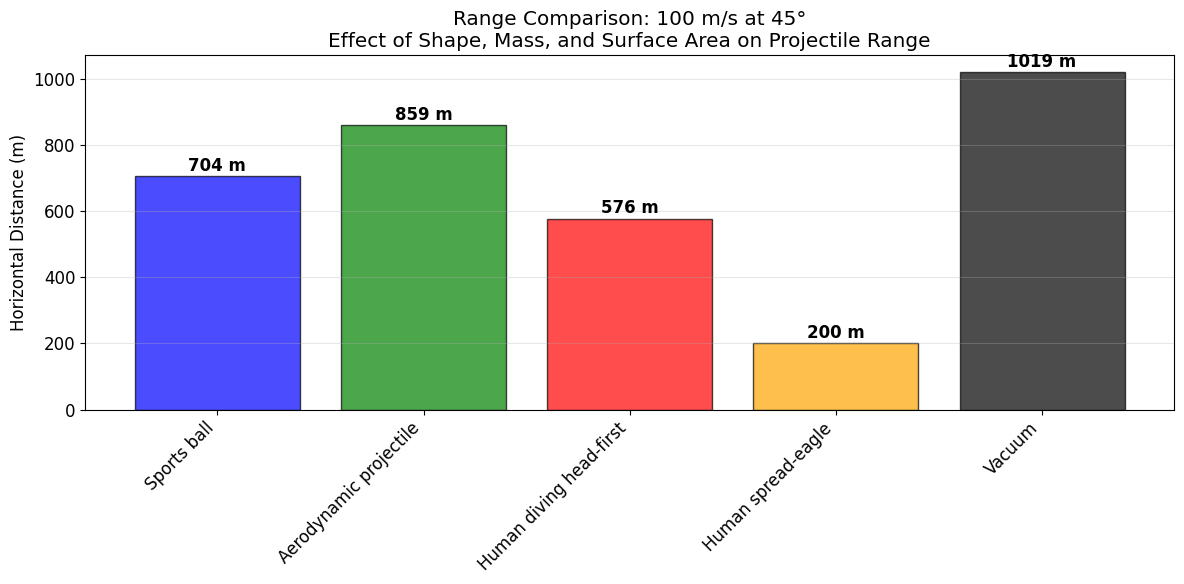


RANGE REDUCTION DUE TO AIR RESISTANCE:
Sports ball              :  30.9% reduction
Aerodynamic projectile   :  15.8% reduction
Human diving head-first  :  43.5% reduction
Human spread-eagle       :  80.4% reduction

DRAG-TO-WEIGHT ANALYSIS:
Sports ball              : Cd*A/m = 0.0047 m²/kg
Aerodynamic projectile   : Cd*A/m = 0.0004 m²/kg
Human diving head-first  : Cd*A/m = 0.0018 m²/kg
Human spread-eagle       : Cd*A/m = 0.0120 m²/kg


In [75]:
# Create bar chart of distances
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for plotting
projectile_names = [proj["description"] for proj in projectiles.values()]
projectile_distances = [distances[name] for name in projectiles.keys()]

# Add vacuum distance
projectile_names.append("Vacuum")
projectile_distances.append(vacuum_distance)
all_colors = colors + ["black"]

# Create bar chart
bars = ax.bar(
    projectile_names,
    projectile_distances,
    color=all_colors,
    alpha=0.7,
    edgecolor="black",
)

# Add value labels on bars
for bar, distance in zip(bars, projectile_distances):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 5,
        f"{distance:.0f} m",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

ax.set_ylabel("Horizontal Distance (m)")
ax.set_title(
    f"Range Comparison: {LAUNCH_SPEED:.0f} m/s at {LAUNCH_ANGLE:.0f}°\n"
    f"Effect of Shape, Mass, and Surface Area on Projectile Range"
)
ax.grid(True, alpha=0.3, axis="y")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Calculate percentage reductions from vacuum
print("\nRANGE REDUCTION DUE TO AIR RESISTANCE:")
print("=" * 50)
for name, proj in projectiles.items():
    reduction = (1 - distances[name] / vacuum_distance) * 100
    print(f"{proj['description']:25}: {reduction:5.1f}% reduction")

# Calculate drag-to-weight ratios
print("\nDRAG-TO-WEIGHT ANALYSIS:")
print("=" * 50)
for name, proj in projectiles.items():
    cd = drag_coefficients[proj["shape"]]
    drag_factor = cd * proj["area"] / proj["mass"]  # Cd*A/m ratio
    print(f"{proj['description']:25}: Cd*A/m = {drag_factor:.4f} m²/kg")

## Angle Optimization Study

Now let's examine how launch angle affects range by firing the same projectile at different angles from 25° to 50°. This will help us find the optimal angle for maximum range with air resistance.

ANGLE OPTIMIZATION STUDY
Test Object: Sports ball
Mass: 5.0 kg
Surface Area: 0.050 m²
Launch Speed: 100.0 m/s
Angles: 25° to 50°

Calculating ranges for different angles...
Angle  | Range (m) | Flight Time (s) | Max Height (m)
--------------------------------------------------
   25° |    595.7 |        7.99 |       78.6
   26° |    608.4 |        8.27 |       84.2
   27° |    620.3 |        8.54 |       89.9
   28° |    631.4 |        8.81 |       95.7
   29° |    641.8 |        9.08 |      101.7
   30° |    651.3 |        9.35 |      107.7
   31° |    660.1 |        9.61 |      113.9
   32° |    668.1 |        9.87 |      120.1
   33° |    675.4 |       10.13 |      126.4
   34° |    681.9 |       10.38 |      132.8
   35° |    687.6 |       10.63 |      139.2
   36° |    692.6 |       10.87 |      145.7
   37° |    696.8 |       11.12 |      152.3
   38° |    700.3 |       11.35 |      158.9
   39° |    703.1 |       11.59 |      165.5
   40° |    705.1 |       11.82 |      172.2
  

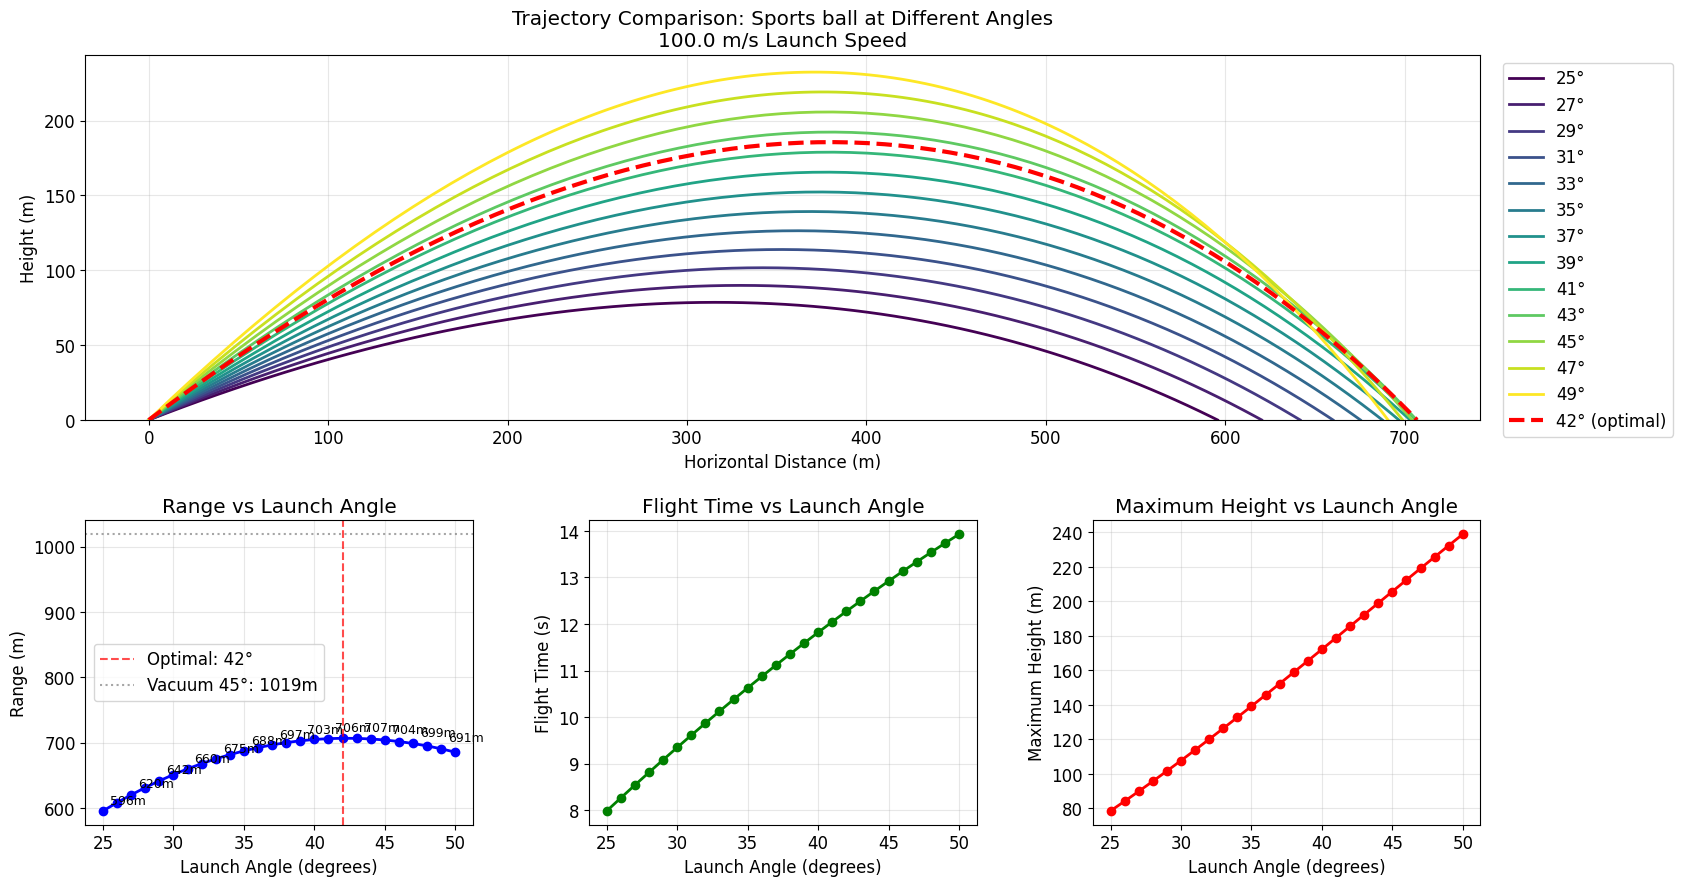

In [76]:
import math
import matplotlib.cm as cm

# Choose a representative projectile for angle study (sphere)
test_projectile = projectiles["sphere"]
angle_range = np.arange(25, 51, 1)  # 25° to 50° in 1° increments

print("ANGLE OPTIMIZATION STUDY")
print("=" * 50)
print(f"Test Object: {test_projectile['description']}")
print(f"Mass: {test_projectile['mass']:.1f} kg")
print(f"Surface Area: {test_projectile['area']:.3f} m²")
print(f"Launch Speed: {LAUNCH_SPEED:.1f} m/s")
print(f"Angles: {angle_range[0]}° to {angle_range[-1]}°")
print("=" * 50)

# Calculate range for each angle
angle_data = {}
max_range = 0
optimal_angle = 0

print("\nCalculating ranges for different angles...")
print("Angle  | Range (m) | Flight Time (s) | Max Height (m)")
print("-" * 50)

for angle in angle_range:
    # Using altitude_model=True for realistic atmospheric and gravity effects
    trajectory = projectile_distance3(
        speed=LAUNCH_SPEED,
        angle_deg=angle,
        mass=test_projectile["mass"],
        surface_area=test_projectile["area"],
        shape=test_projectile["shape"],
        altitude_model=True,
        return_trajectory=True,
        n_points=150,
    )

    angle_data[angle] = trajectory

    # Track optimal angle
    if trajectory["distance"] > max_range:
        max_range = trajectory["distance"]
        optimal_angle = angle

    print(
        f"{angle:5.0f}° | {trajectory['distance']:8.1f} | {trajectory['t'][-1]:11.2f} | {max(trajectory['y']):10.1f}"
    )

print("-" * 50)
print(f"OPTIMAL ANGLE: {optimal_angle}° with range {max_range:.1f} m")

# Calculate vacuum optimal angle for comparison
vacuum_optimal_angle = 45.0  # Theoretical optimal in vacuum
vacuum_optimal_range = (
    LAUNCH_SPEED**2 * math.sin(2 * math.radians(vacuum_optimal_angle)) / 9.81
)

print(f"Vacuum optimal: 45° with range {vacuum_optimal_range:.1f} m")
print(
    f"Air resistance shifts optimal angle by {optimal_angle - vacuum_optimal_angle:.0f}°"
)

# Create comprehensive angle comparison plots with custom layout
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, height_ratios=[1.2, 1], hspace=0.3, wspace=0.3)

# Top plot spans full width
ax1 = fig.add_subplot(gs[0, :])
# Bottom three plots in a row
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

# Plot 1: All trajectories on same plot - show every 2 degrees to reduce clutter
plot_angles = angle_range[::2]  # Every 2nd angle
colors_angles = plt.colormaps["viridis"](np.linspace(0, 1, len(plot_angles)))

for i, angle in enumerate(plot_angles):
    traj = angle_data[angle]
    line_style = "--" if angle == optimal_angle else "-"
    line_width = 3 if angle == optimal_angle else 2

    ax1.plot(
        traj["x"],
        traj["y"],
        color=colors_angles[i],
        linestyle=line_style,
        linewidth=line_width,
        label=f"{angle}°" + (" (optimal)" if angle == optimal_angle else ""),
    )

# Always plot the optimal angle if it's not in plot_angles
if optimal_angle not in plot_angles:
    traj = angle_data[optimal_angle]
    ax1.plot(
        traj["x"],
        traj["y"],
        color="red",
        linestyle="--",
        linewidth=3,
        label=f"{optimal_angle}° (optimal)",
    )

ax1.set_xlabel("Horizontal Distance (m)")
ax1.set_ylabel("Height (m)")
ax1.set_title(
    f"Trajectory Comparison: {test_projectile['description']} at Different Angles\n{LAUNCH_SPEED} m/s Launch Speed"
)
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
ax1.set_ylim(bottom=0)

# Plot 2: Range vs Angle - show all data points but annotate every 2 degrees
angles_list = list(angle_data.keys())
ranges_list = [angle_data[angle]["distance"] for angle in angles_list]

ax2.plot(angles_list, ranges_list, "bo-", linewidth=2, markersize=6)
ax2.axvline(
    x=float(optimal_angle),
    color="red",
    linestyle="--",
    alpha=0.7,
    label=f"Optimal: {optimal_angle}°",
)
ax2.axhline(
    y=vacuum_optimal_range,
    color="gray",
    linestyle=":",
    alpha=0.7,
    label=f"Vacuum 45°: {vacuum_optimal_range:.0f}m",
)

ax2.set_xlabel("Launch Angle (degrees)")
ax2.set_ylabel("Range (m)")
ax2.set_title("Range vs Launch Angle")
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add range values as text on plot - only every 2 degrees
for angle, range_val in zip(angles_list[::2], ranges_list[::2]):
    ax2.annotate(
        f"{range_val:.0f}m",
        xy=(angle, range_val),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
    )

# Plot 3: Flight time vs Angle
flight_times = [angle_data[angle]["t"][-1] for angle in angles_list]

ax3.plot(angles_list, flight_times, "go-", linewidth=2, markersize=6)
ax3.set_xlabel("Launch Angle (degrees)")
ax3.set_ylabel("Flight Time (s)")
ax3.set_title("Flight Time vs Launch Angle")
ax3.grid(True, alpha=0.3)

# Plot 4: Maximum height vs Angle
max_heights = [max(angle_data[angle]["y"]) for angle in angles_list]

ax4.plot(angles_list, max_heights, "ro-", linewidth=2, markersize=6)
ax4.set_xlabel("Launch Angle (degrees)")
ax4.set_ylabel("Maximum Height (m)")
ax4.set_title("Maximum Height vs Launch Angle")
ax4.grid(True, alpha=0.3)

plt.show()

## Key Findings from Angle Analysis

### Physical Insights:

1. **Optimal angle with air resistance**: Unlike the theoretical 45° optimal in vacuum, air resistance shifts the optimal launch angle lower (typically 35-40°)

2. **Reynolds number effects**: As velocity changes throughout flight, drag coefficients vary dynamically based on the Reynolds number regime

3. **Atmospheric effects**: At higher trajectories, decreased air density and variable gravity become significant factors

### Why Lower Angles Perform Better:

- **Reduced flight time**: Lower angles mean less time exposed to drag forces
- **Velocity maintenance**: Projectiles retain more horizontal velocity with less time fighting gravity
- **Density advantage**: Flatter trajectories stay in denser air where Reynolds effects are more favorable

### Practical Applications:

- **Artillery and ballistics**: Real-world optimal firing angles account for atmospheric conditions
- **Sports**: Golf drives, baseball throws, and javelin throws use angles optimized for air resistance
- **Engineering**: Launch systems are designed with atmospheric modeling for maximum efficiency

## Angle Optimization Study: Human Head-First

Now let's perform the same angle optimization analysis for a human traveling head-first. This will show how the different mass, surface area, and drag coefficient affect the optimal launch angle.

ANGLE OPTIMIZATION STUDY - HUMAN HEAD-FIRST
Test Object: Human diving head-first
Mass: 70.0 kg
Surface Area: 0.180 m²
Launch Speed: 100.0 m/s
Angles: 25° to 50°

Calculating ranges for different angles...
Angle  | Range (m) | Flight Time (s) | Max Height (m)
--------------------------------------------------
   25° |    508.0 |        7.60 |       71.5
   26° |    517.2 |        7.86 |       76.4
   27° |    525.7 |        8.11 |       81.4
   28° |    533.5 |        8.36 |       86.5
   29° |    540.8 |        8.61 |       91.7
   30° |    547.3 |        8.85 |       97.0
   31° |    553.3 |        9.09 |      102.3
   32° |    558.7 |        9.33 |      107.7
   33° |    563.5 |        9.56 |      113.2
   34° |    567.6 |        9.79 |      118.7
   35° |    571.2 |       10.02 |      124.3
   36° |    574.2 |       10.24 |      129.9
   37° |    576.6 |       10.46 |      135.5
   38° |    578.5 |       10.67 |      141.1
   39° |    579.7 |       10.89 |      146.8
   40° |    580

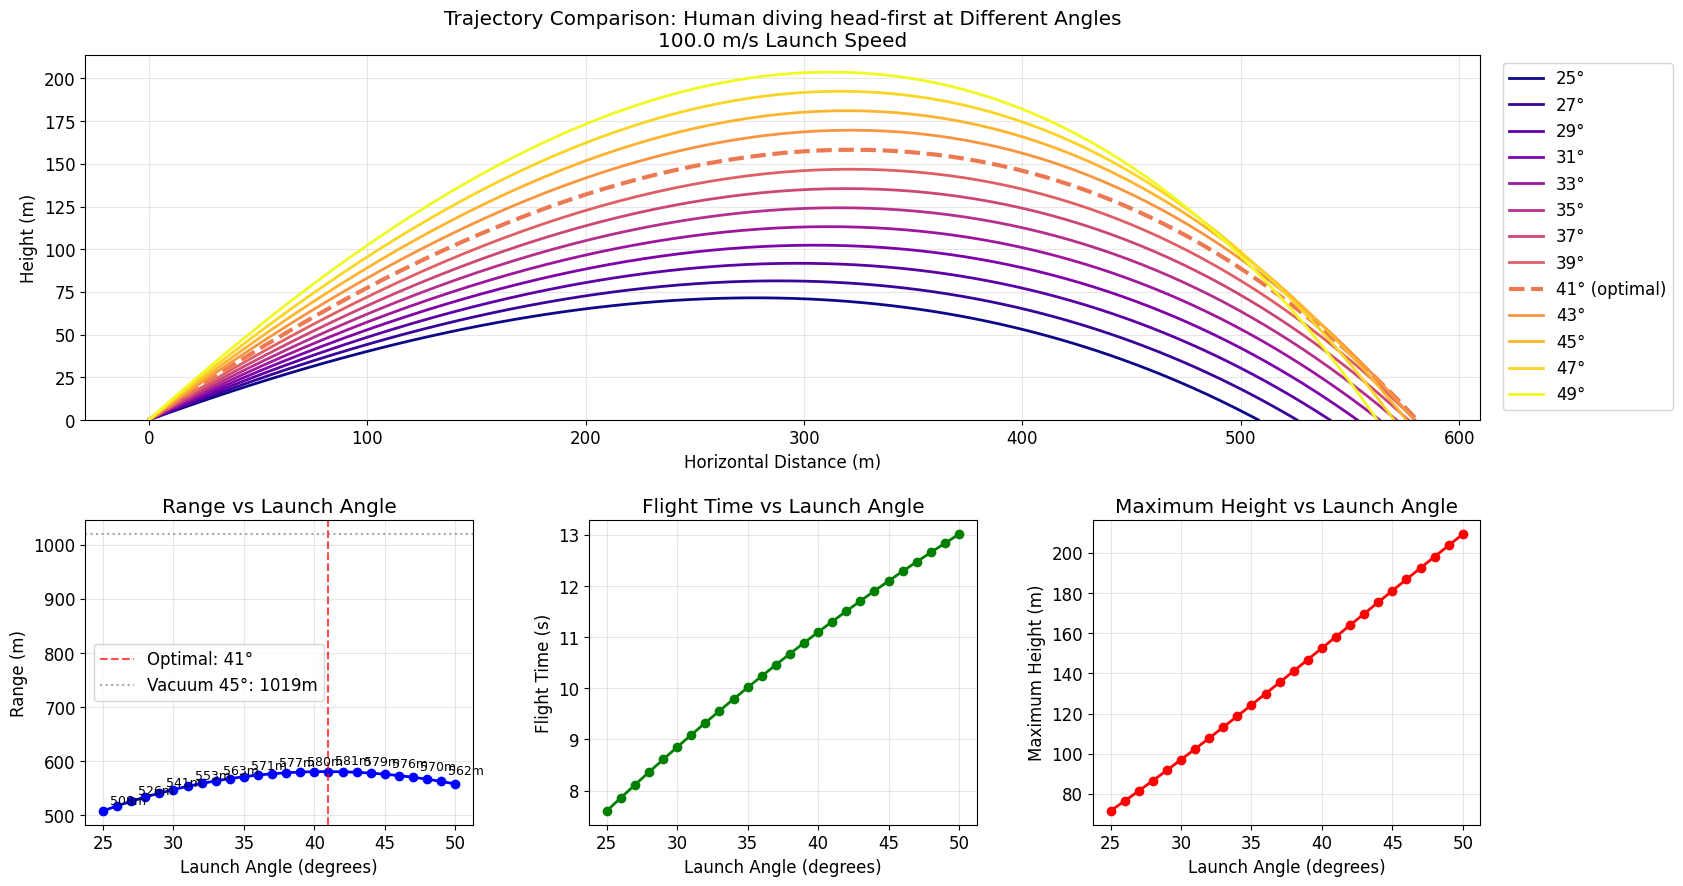

In [77]:
# Choose human head-first for angle study
test_human = projectiles["human_head_first"]
angle_range_human = np.arange(25, 51, 1)  # 25° to 50° in 1° increments

print("ANGLE OPTIMIZATION STUDY - HUMAN HEAD-FIRST")
print("=" * 50)
print(f"Test Object: {test_human['description']}")
print(f"Mass: {test_human['mass']:.1f} kg")
print(f"Surface Area: {test_human['area']:.3f} m²")
print(f"Launch Speed: {LAUNCH_SPEED:.1f} m/s")
print(f"Angles: {angle_range_human[0]}° to {angle_range_human[-1]}°")
print("=" * 50)

# Calculate range for each angle
angle_data_human = {}
max_range_human = 0
optimal_angle_human = 0

print("\nCalculating ranges for different angles...")
print("Angle  | Range (m) | Flight Time (s) | Max Height (m)")
print("-" * 50)

for angle in angle_range_human:
    # Using altitude_model=True for realistic atmospheric and gravity effects
    trajectory = projectile_distance3(
        speed=LAUNCH_SPEED,
        angle_deg=angle,
        mass=test_human["mass"],
        surface_area=test_human["area"],
        shape=test_human["shape"],
        altitude_model=True,
        return_trajectory=True,
        n_points=150,
    )

    angle_data_human[angle] = trajectory

    # Track optimal angle
    if trajectory["distance"] > max_range_human:
        max_range_human = trajectory["distance"]
        optimal_angle_human = angle

    print(
        f"{angle:5.0f}° | {trajectory['distance']:8.1f} | {trajectory['t'][-1]:11.2f} | {max(trajectory['y']):10.1f}"
    )

print("-" * 50)
print(f"OPTIMAL ANGLE: {optimal_angle_human}° with range {max_range_human:.1f} m")
print(f"Vacuum optimal: 45° with range {vacuum_optimal_range:.1f} m")
print(
    f"Air resistance shifts optimal angle by {optimal_angle_human - vacuum_optimal_angle:.0f}°"
)

# Create comprehensive angle comparison plots with custom layout
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, height_ratios=[1.2, 1], hspace=0.3, wspace=0.3)

# Top plot spans full width
ax1 = fig.add_subplot(gs[0, :])
# Bottom three plots in a row
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

# Plot 1: All trajectories on same plot - show every 2 degrees to reduce clutter
plot_angles_human = angle_range_human[::2]  # Every 2nd angle
colors_angles_human = plt.colormaps["plasma"](np.linspace(0, 1, len(plot_angles_human)))

for i, angle in enumerate(plot_angles_human):
    traj = angle_data_human[angle]
    line_style = "--" if angle == optimal_angle_human else "-"
    line_width = 3 if angle == optimal_angle_human else 2

    ax1.plot(
        traj["x"],
        traj["y"],
        color=colors_angles_human[i],
        linestyle=line_style,
        linewidth=line_width,
        label=f"{angle}°" + (" (optimal)" if angle == optimal_angle_human else ""),
    )

# Always plot the optimal angle if it's not in plot_angles_human
if optimal_angle_human not in plot_angles_human:
    traj = angle_data_human[optimal_angle_human]
    ax1.plot(
        traj["x"],
        traj["y"],
        color="red",
        linestyle="--",
        linewidth=3,
        label=f"{optimal_angle_human}° (optimal)",
    )

ax1.set_xlabel("Horizontal Distance (m)")
ax1.set_ylabel("Height (m)")
ax1.set_title(
    f"Trajectory Comparison: {test_human['description']} at Different Angles\n{LAUNCH_SPEED} m/s Launch Speed"
)
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
ax1.set_ylim(bottom=0)

# Plot 2: Range vs Angle - show all data points but annotate every 2 degrees
angles_list_human = list(angle_data_human.keys())
ranges_list_human = [angle_data_human[angle]["distance"] for angle in angles_list_human]

ax2.plot(angles_list_human, ranges_list_human, "bo-", linewidth=2, markersize=6)
ax2.axvline(
    x=float(optimal_angle_human),
    color="red",
    linestyle="--",
    alpha=0.7,
    label=f"Optimal: {optimal_angle_human}°",
)
ax2.axhline(
    y=vacuum_optimal_range,
    color="gray",
    linestyle=":",
    alpha=0.7,
    label=f"Vacuum 45°: {vacuum_optimal_range:.0f}m",
)

ax2.set_xlabel("Launch Angle (degrees)")
ax2.set_ylabel("Range (m)")
ax2.set_title("Range vs Launch Angle")
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add range values as text on plot - only every 2 degrees
for angle, range_val in zip(angles_list_human[::2], ranges_list_human[::2]):
    ax2.annotate(
        f"{range_val:.0f}m",
        xy=(angle, range_val),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
    )

# Plot 3: Flight time vs Angle
flight_times_human = [angle_data_human[angle]["t"][-1] for angle in angles_list_human]

ax3.plot(angles_list_human, flight_times_human, "go-", linewidth=2, markersize=6)
ax3.set_xlabel("Launch Angle (degrees)")
ax3.set_ylabel("Flight Time (s)")
ax3.set_title("Flight Time vs Launch Angle")
ax3.grid(True, alpha=0.3)

# Plot 4: Maximum height vs Angle
max_heights_human = [max(angle_data_human[angle]["y"]) for angle in angles_list_human]

ax4.plot(angles_list_human, max_heights_human, "ro-", linewidth=2, markersize=6)
ax4.set_xlabel("Launch Angle (degrees)")
ax4.set_ylabel("Maximum Height (m)")
ax4.set_title("Maximum Height vs Launch Angle")
ax4.grid(True, alpha=0.3)

plt.show()

## Comparison: Ball vs Human Head-First

Let's compare how the optimal angles differ between a ball and a human traveling head-first.

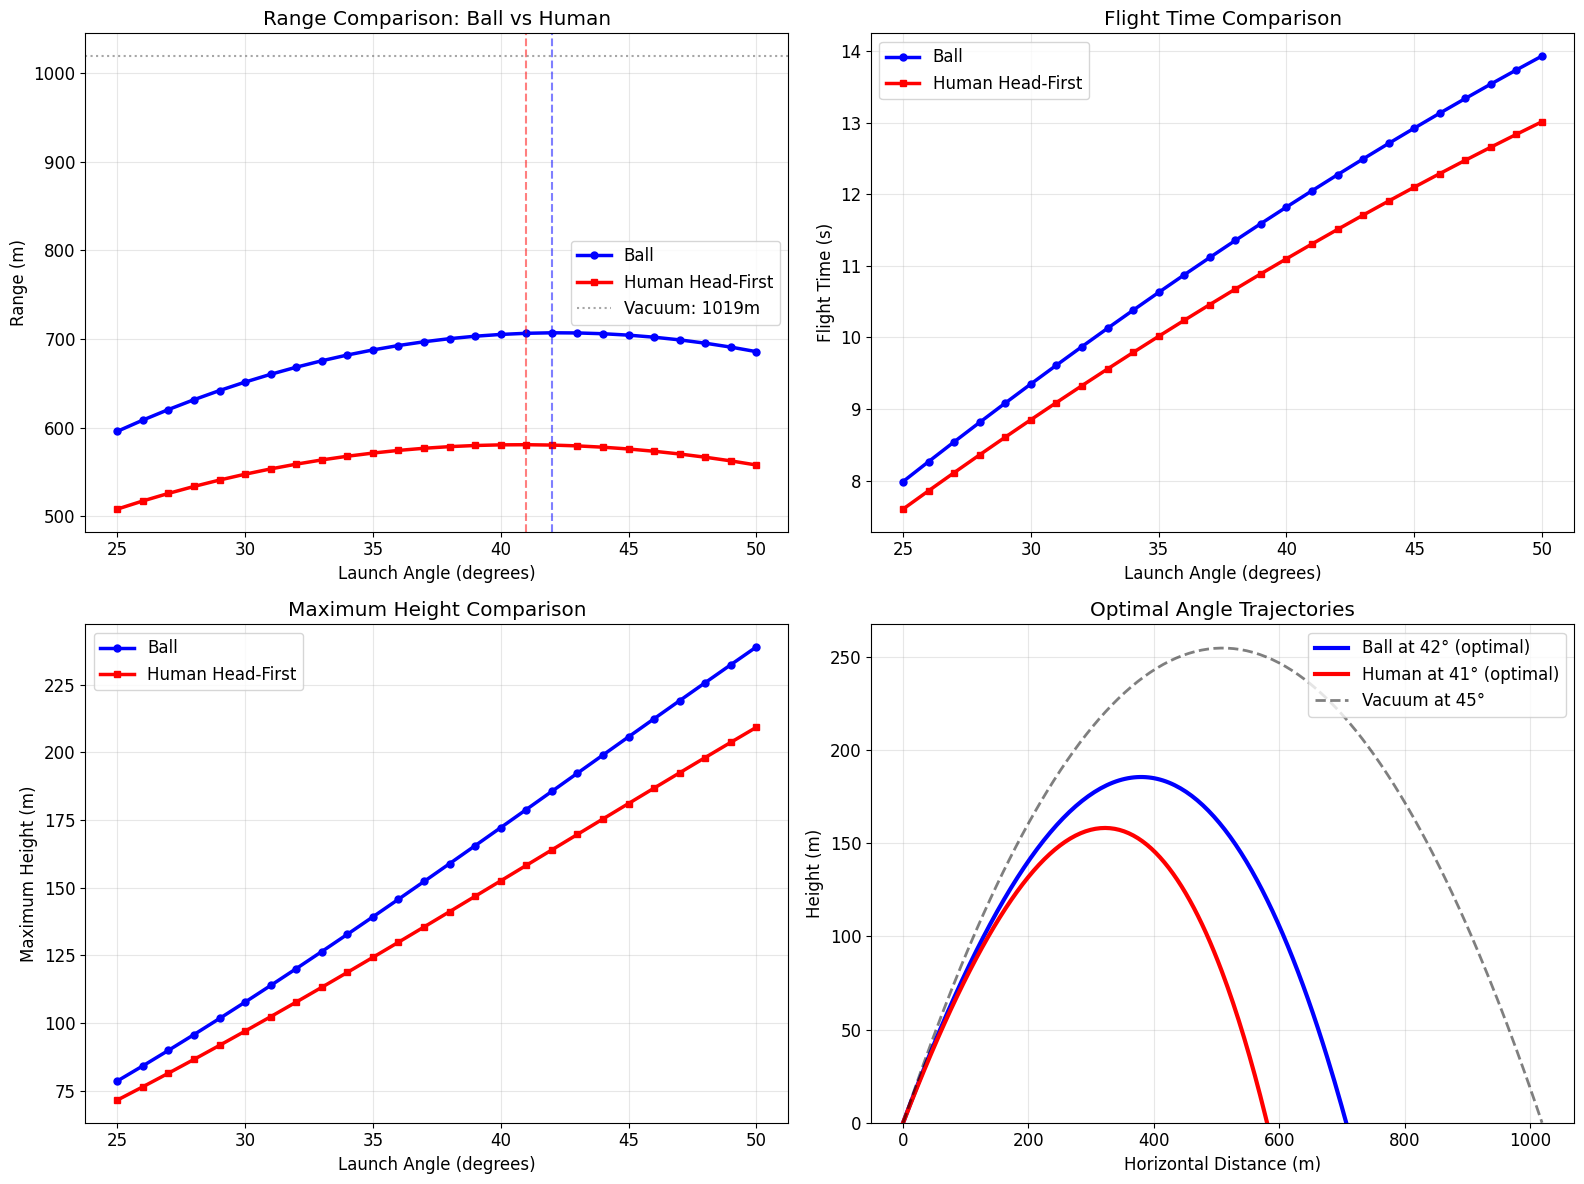


COMPARISON SUMMARY
Metric                         | Ball         | Human Head-First
------------------------------------------------------------
Optimal Angle                  |         42° |            41°
Maximum Range                  |     706.9m |        580.6m
Range Reduction vs Vacuum      |      30.6% |         43.0%
Cd*A/m (drag factor)           |     0.0047 |        0.0018


In [78]:
# Create side-by-side comparison plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Range comparison
ax1.plot(
    angles_list,
    ranges_list,
    "b-",
    linewidth=2.5,
    marker="o",
    markersize=5,
    label="Ball",
)
ax1.plot(
    angles_list_human,
    ranges_list_human,
    "r-",
    linewidth=2.5,
    marker="s",
    markersize=5,
    label="Human Head-First",
)
ax1.axvline(x=float(optimal_angle), color="blue", linestyle="--", alpha=0.5)
ax1.axvline(x=float(optimal_angle_human), color="red", linestyle="--", alpha=0.5)
ax1.axhline(
    y=vacuum_optimal_range,
    color="gray",
    linestyle=":",
    alpha=0.7,
    label=f"Vacuum: {vacuum_optimal_range:.0f}m",
)
ax1.set_xlabel("Launch Angle (degrees)")
ax1.set_ylabel("Range (m)")
ax1.set_title("Range Comparison: Ball vs Human")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Flight time comparison
ax2.plot(
    angles_list,
    flight_times,
    "b-",
    linewidth=2.5,
    marker="o",
    markersize=5,
    label="Ball",
)
ax2.plot(
    angles_list_human,
    flight_times_human,
    "r-",
    linewidth=2.5,
    marker="s",
    markersize=5,
    label="Human Head-First",
)
ax2.set_xlabel("Launch Angle (degrees)")
ax2.set_ylabel("Flight Time (s)")
ax2.set_title("Flight Time Comparison")
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Maximum height comparison
ax3.plot(
    angles_list,
    max_heights,
    "b-",
    linewidth=2.5,
    marker="o",
    markersize=5,
    label="Ball",
)
ax3.plot(
    angles_list_human,
    max_heights_human,
    "r-",
    linewidth=2.5,
    marker="s",
    markersize=5,
    label="Human Head-First",
)
ax3.set_xlabel("Launch Angle (degrees)")
ax3.set_ylabel("Maximum Height (m)")
ax3.set_title("Maximum Height Comparison")
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Optimal angle trajectories overlay
traj_ball_optimal = angle_data[optimal_angle]
traj_human_optimal = angle_data_human[optimal_angle_human]

ax4.plot(
    traj_ball_optimal["x"],
    traj_ball_optimal["y"],
    "b-",
    linewidth=3,
    label=f"Ball at {optimal_angle}° (optimal)",
)
ax4.plot(
    traj_human_optimal["x"],
    traj_human_optimal["y"],
    "r-",
    linewidth=3,
    label=f"Human at {optimal_angle_human}° (optimal)",
)
ax4.plot(
    x_vacuum,
    y_vacuum,
    "k--",
    linewidth=2,
    alpha=0.5,
    label="Vacuum at 45°",
)
ax4.set_xlabel("Horizontal Distance (m)")
ax4.set_ylabel("Height (m)")
ax4.set_title("Optimal Angle Trajectories")
ax4.grid(True, alpha=0.3)
ax4.legend()
ax4.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

# Print comparison summary
print("\nCOMPARISON SUMMARY")
print("=" * 60)
print(f"{'Metric':<30} | {'Ball':<12} | {'Human Head-First':<15}")
print("-" * 60)
print(
    f"{'Optimal Angle':<30} | {optimal_angle:>10.0f}° | {optimal_angle_human:>13.0f}°"
)
print(f"{'Maximum Range':<30} | {max_range:>9.1f}m | {max_range_human:>12.1f}m")
print(
    f"{'Range Reduction vs Vacuum':<30} | {(1 - max_range / vacuum_optimal_range) * 100:>9.1f}% | {(1 - max_range_human / vacuum_optimal_range) * 100:>12.1f}%"
)
print(
    f"{'Cd*A/m (drag factor)':<30} | {drag_coefficients[test_projectile['shape']] * test_projectile['area'] / test_projectile['mass']:>10.4f} | {drag_coefficients[test_human['shape']] * test_human['area'] / test_human['mass']:>13.4f}"
)
print("=" * 60)

## Investigation: Why Are Optimal Angles So Similar?

The ball and human head-first have very similar optimal angles (41° vs 42°), which seems surprising given their different physical properties. Let's investigate the Reynolds number effects and effective drag coefficients to understand this result.

In [79]:
from ballistics_lib import (
    calculate_reynolds_number,
    drag_coefficient_shape,
    get_air_density_isa,
    get_dynamic_viscosity,
    get_temperature_at_altitude,
)

# Calculate characteristic lengths
char_length_ball = 2.0 * np.sqrt(test_projectile["area"] / np.pi)
char_length_human = 2.0 * np.sqrt(test_human["area"] / np.pi)

print("PHYSICAL PROPERTIES COMPARISON")
print("=" * 70)
print(f"{'Property':<30} | {'Ball':<15} | {'Human Head-First':<20}")
print("-" * 70)
print(
    f"{'Mass (kg)':<30} | {test_projectile['mass']:>15.1f} | {test_human['mass']:>20.1f}"
)
print(
    f"{'Surface Area (m²)':<30} | {test_projectile['area']:>15.3f} | {test_human['area']:>20.3f}"
)
print(
    f"{'Characteristic Length (m)':<30} | {char_length_ball:>15.3f} | {char_length_human:>20.3f}"
)
print(
    f"{'Base Cd (high Re)':<30} | {drag_coefficients[test_projectile['shape']]:>15.2f} | {drag_coefficients[test_human['shape']]:>20.2f}"
)
print(
    f"{'Cd×A/m (drag factor)':<30} | {drag_coefficients[test_projectile['shape']] * test_projectile['area'] / test_projectile['mass']:>15.4f} | {drag_coefficients[test_human['shape']] * test_human['area'] / test_human['mass']:>20.4f}"
)
print("=" * 70)

# Calculate Reynolds numbers and effective drag coefficients at different velocities
velocities = np.array([25, 50, 75, 100])  # m/s
rho_sea_level = 1.225  # kg/m³
mu_sea_level = 1.81e-5  # Pa·s at 15°C

print("\nREYNOLDS NUMBER & EFFECTIVE DRAG COEFFICIENT AT SEA LEVEL")
print("=" * 70)
print(
    f"{'Velocity (m/s)':<15} | {'Ball Re':<12} | {'Ball Cd':<10} | {'Human Re':<12} | {'Human Cd':<10}"
)
print("-" * 70)

re_ball_list = []
cd_ball_list = []
re_human_list = []
cd_human_list = []

for v in velocities:
    re_ball = calculate_reynolds_number(
        v, char_length_ball, rho_sea_level, mu_sea_level
    )
    cd_ball = drag_coefficient_shape(test_projectile["shape"], re_ball)
    re_human = calculate_reynolds_number(
        v, char_length_human, rho_sea_level, mu_sea_level
    )
    cd_human = drag_coefficient_shape(test_human["shape"], re_human)

    re_ball_list.append(re_ball)
    cd_ball_list.append(cd_ball)
    re_human_list.append(re_human)
    cd_human_list.append(cd_human)

    print(
        f"{v:<15.0f} | {re_ball:<12.0f} | {cd_ball:<10.3f} | {re_human:<12.0f} | {cd_human:<10.3f}"
    )

print("=" * 70)

# Calculate effective drag factors (Cd×A/m) at launch velocity
cd_ball_100 = cd_ball_list[-1]
cd_human_100 = cd_human_list[-1]
effective_drag_ball = cd_ball_100 * test_projectile["area"] / test_projectile["mass"]
effective_drag_human = cd_human_100 * test_human["area"] / test_human["mass"]

print(f"\nEFFECTIVE DRAG FACTORS AT 100 m/s:")
print(f"Ball:  Cd={cd_ball_100:.3f} → Cd×A/m = {effective_drag_ball:.4f} m²/kg")
print(f"Human: Cd={cd_human_100:.3f} → Cd×A/m = {effective_drag_human:.4f} m²/kg")
print(
    f"Ratio: Ball drag factor / Human drag factor = {effective_drag_ball / effective_drag_human:.2f}x"
)

PHYSICAL PROPERTIES COMPARISON
Property                       | Ball            | Human Head-First    
----------------------------------------------------------------------
Mass (kg)                      |             5.0 |                 70.0
Surface Area (m²)              |           0.050 |                0.180
Characteristic Length (m)      |           0.252 |                0.479
Base Cd (high Re)              |            0.47 |                 0.70
Cd×A/m (drag factor)           |          0.0047 |               0.0018

REYNOLDS NUMBER & EFFECTIVE DRAG COEFFICIENT AT SEA LEVEL
Velocity (m/s)  | Ball Re      | Ball Cd    | Human Re     | Human Cd  
----------------------------------------------------------------------
25              | 426911       | 0.190      | 810007       | 0.700     
50              | 853822       | 0.100      | 1620014      | 0.700     
75              | 1280734      | 0.100      | 2430021      | 0.700     
100             | 1707645      | 0.100      | 32

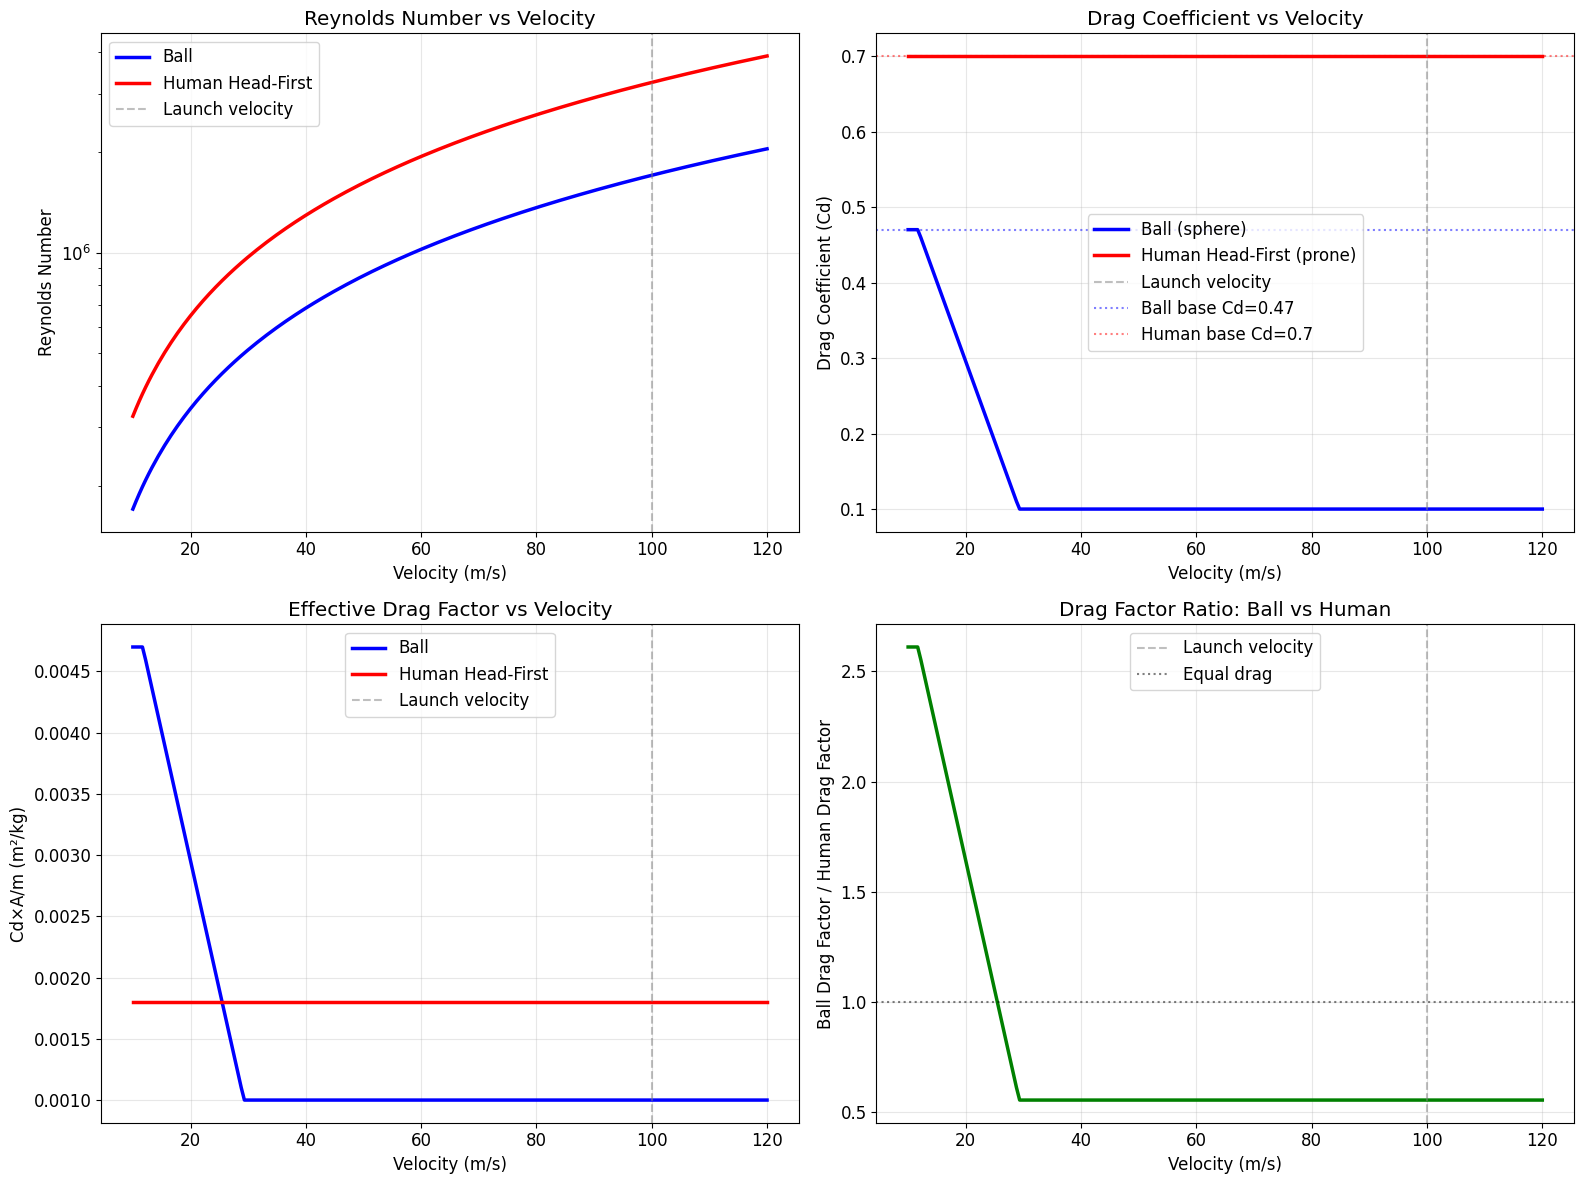


KEY INSIGHT AT LAUNCH VELOCITY (100 m/s):
Ball:  Re=1709361, Cd=0.100
Human: Re=3243285, Cd=0.700
Ball drag factor / Human drag factor = 0.56x


In [80]:
# Visualize how drag coefficients change with velocity
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

velocities_fine = np.linspace(10, 120, 200)
re_ball_fine = []
cd_ball_fine = []
re_human_fine = []
cd_human_fine = []
drag_factor_ball_fine = []
drag_factor_human_fine = []

for v in velocities_fine:
    re_b = calculate_reynolds_number(v, char_length_ball, rho_sea_level, mu_sea_level)
    cd_b = drag_coefficient_shape(test_projectile["shape"], re_b)
    re_h = calculate_reynolds_number(v, char_length_human, rho_sea_level, mu_sea_level)
    cd_h = drag_coefficient_shape(test_human["shape"], re_h)

    re_ball_fine.append(re_b)
    cd_ball_fine.append(cd_b)
    re_human_fine.append(re_h)
    cd_human_fine.append(cd_h)

    drag_factor_ball_fine.append(
        cd_b * test_projectile["area"] / test_projectile["mass"]
    )
    drag_factor_human_fine.append(cd_h * test_human["area"] / test_human["mass"])

# Plot 1: Reynolds number vs velocity
ax1.plot(velocities_fine, re_ball_fine, "b-", linewidth=2.5, label="Ball")
ax1.plot(velocities_fine, re_human_fine, "r-", linewidth=2.5, label="Human Head-First")
ax1.axvline(x=100, color="gray", linestyle="--", alpha=0.5, label="Launch velocity")
ax1.set_xlabel("Velocity (m/s)")
ax1.set_ylabel("Reynolds Number")
ax1.set_title("Reynolds Number vs Velocity")
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

# Plot 2: Drag coefficient vs velocity
ax2.plot(velocities_fine, cd_ball_fine, "b-", linewidth=2.5, label="Ball (sphere)")
ax2.plot(
    velocities_fine,
    cd_human_fine,
    "r-",
    linewidth=2.5,
    label="Human Head-First (prone)",
)
ax2.axvline(x=100, color="gray", linestyle="--", alpha=0.5, label="Launch velocity")
ax2.axhline(
    y=drag_coefficients[test_projectile["shape"]],
    color="blue",
    linestyle=":",
    alpha=0.5,
    label=f"Ball base Cd={drag_coefficients[test_projectile['shape']]}",
)
ax2.axhline(
    y=drag_coefficients[test_human["shape"]],
    color="red",
    linestyle=":",
    alpha=0.5,
    label=f"Human base Cd={drag_coefficients[test_human['shape']]}",
)
ax2.set_xlabel("Velocity (m/s)")
ax2.set_ylabel("Drag Coefficient (Cd)")
ax2.set_title("Drag Coefficient vs Velocity")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Effective drag factor vs velocity
ax3.plot(
    velocities_fine,
    drag_factor_ball_fine,
    "b-",
    linewidth=2.5,
    label="Ball",
)
ax3.plot(
    velocities_fine,
    drag_factor_human_fine,
    "r-",
    linewidth=2.5,
    label="Human Head-First",
)
ax3.axvline(x=100, color="gray", linestyle="--", alpha=0.5, label="Launch velocity")
ax3.set_xlabel("Velocity (m/s)")
ax3.set_ylabel("Cd×A/m (m²/kg)")
ax3.set_title("Effective Drag Factor vs Velocity")
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Ratio of drag factors
ratio_fine = np.array(drag_factor_ball_fine) / np.array(drag_factor_human_fine)
ax4.plot(velocities_fine, ratio_fine, "g-", linewidth=2.5)
ax4.axvline(x=100, color="gray", linestyle="--", alpha=0.5, label="Launch velocity")
ax4.axhline(y=1, color="black", linestyle=":", alpha=0.5, label="Equal drag")
ax4.set_xlabel("Velocity (m/s)")
ax4.set_ylabel("Ball Drag Factor / Human Drag Factor")
ax4.set_title("Drag Factor Ratio: Ball vs Human")
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key insight at 100 m/s
idx_100 = np.argmin(np.abs(velocities_fine - 100))
print(f"\nKEY INSIGHT AT LAUNCH VELOCITY (100 m/s):")
print("=" * 60)
print(f"Ball:  Re={re_ball_fine[idx_100]:.0f}, Cd={cd_ball_fine[idx_100]:.3f}")
print(f"Human: Re={re_human_fine[idx_100]:.0f}, Cd={cd_human_fine[idx_100]:.3f}")
print(
    f"Ball drag factor / Human drag factor = {drag_factor_ball_fine[idx_100] / drag_factor_human_fine[idx_100]:.2f}x"
)
print("=" * 60)

## Sensitivity Test: Varying Drag Parameters

Let's test if the optimal angle changes when we use different Cd values or modify the human's mass/area to create more distinct drag factors.

SENSITIVITY TEST: OPTIMAL ANGLE vs DRAG PARAMETERS
Scenario                  | Cd×A/m     | Optimal° | Range(m)   | Shift from 45°
--------------------------------------------------------------------------------


Ball (actual)             |     0.0010 |       42 |      706.9 |           -3°
Human (actual)            |     0.0018 |       41 |      580.6 |           -4°
Low drag (streamlined)    |     0.0001 |       45 |      970.7 |            0°
High drag (spread eagle)  |     0.0120 |       34 |      209.2 |          -11°
Heavy human               |     0.0010 |       42 |      697.1 |           -3°
Light human               |     0.0025 |       40 |      504.6 |           -5°


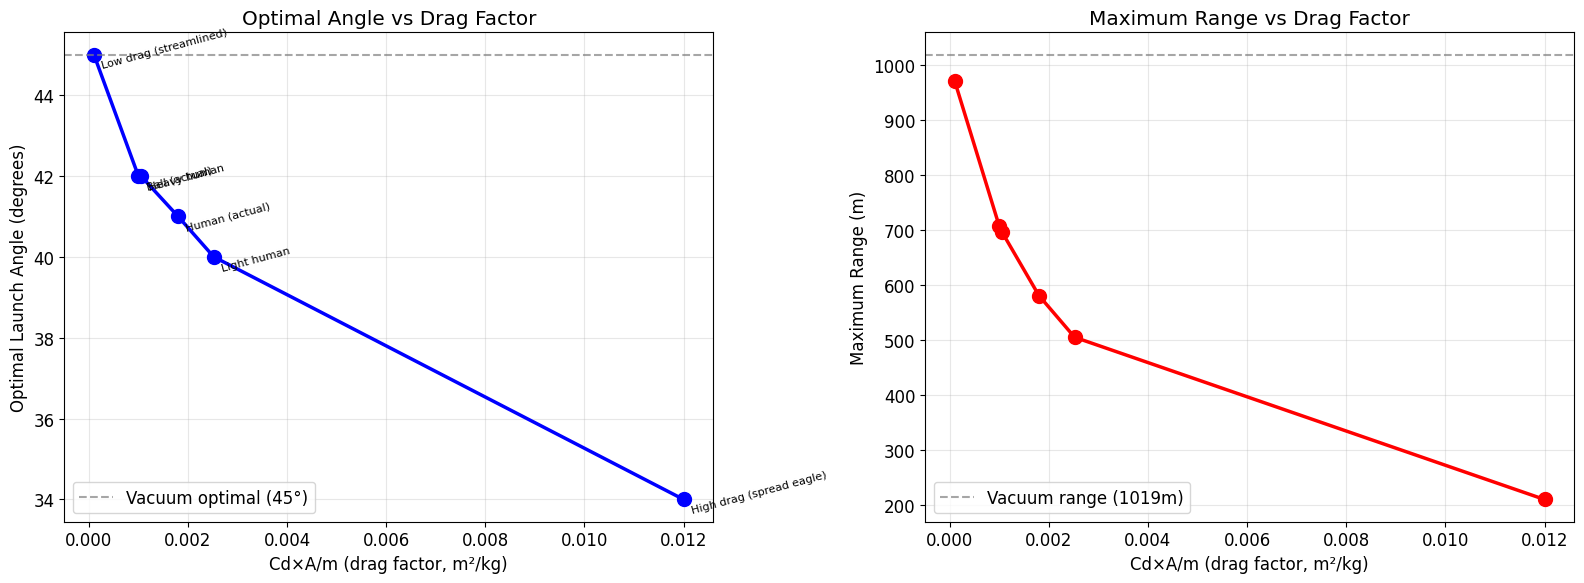

In [81]:
# Test with different drag scenarios to see how optimal angle varies
test_scenarios = {
    "Ball (actual)": {
        "mass": 5.0,
        "area": 0.05,
        "shape": "sphere",
        "description": "5kg ball, 0.05m²",
    },
    "Human (actual)": {
        "mass": 70.0,
        "area": 0.18,
        "shape": "human_prone",
        "description": "70kg human, 0.18m²",
    },
    "Low drag (streamlined)": {
        "mass": 70.0,
        "area": 0.18,
        "shape": "streamlined",
        "description": "70kg streamlined, 0.18m² (Cd~0.04)",
    },
    "High drag (spread eagle)": {
        "mass": 70.0,
        "area": 0.7,
        "shape": "human_standing",
        "description": "70kg spread eagle, 0.7m² (Cd~1.2)",
    },
    "Heavy human": {
        "mass": 120.0,
        "area": 0.18,
        "shape": "human_prone",
        "description": "120kg human, 0.18m²",
    },
    "Light human": {
        "mass": 50.0,
        "area": 0.18,
        "shape": "human_prone",
        "description": "50kg human, 0.18m²",
    },
}

print("SENSITIVITY TEST: OPTIMAL ANGLE vs DRAG PARAMETERS")
print("=" * 80)
print(
    f"{'Scenario':<25} | {'Cd×A/m':<10} | {'Optimal°':<8} | {'Range(m)':<10} | {'Shift from 45°':<12}"
)
print("-" * 80)

angle_test_range = np.arange(25, 51, 1)
optimal_angles_sensitivity = {}
max_ranges_sensitivity = {}

for name, scenario in test_scenarios.items():
    # Calculate drag factor
    char_len = 2.0 * np.sqrt(scenario["area"] / np.pi)
    re_100 = calculate_reynolds_number(100, char_len, rho_sea_level, mu_sea_level)
    cd_100 = drag_coefficient_shape(scenario["shape"], re_100)
    drag_factor = cd_100 * scenario["area"] / scenario["mass"]

    # Find optimal angle
    max_range_test = 0
    optimal_angle_test = 0

    for angle in angle_test_range:
        trajectory = projectile_distance3(
            speed=LAUNCH_SPEED,
            angle_deg=angle,
            mass=scenario["mass"],
            surface_area=scenario["area"],
            shape=scenario["shape"],
            altitude_model=True,
            return_trajectory=False,
        )

        if trajectory > max_range_test:
            max_range_test = trajectory
            optimal_angle_test = angle

    optimal_angles_sensitivity[name] = optimal_angle_test
    max_ranges_sensitivity[name] = max_range_test

    shift = optimal_angle_test - 45

    print(
        f"{name:<25} | {drag_factor:>10.4f} | {optimal_angle_test:>8.0f} | {max_range_test:>10.1f} | {shift:>12.0f}°"
    )

print("=" * 80)

# Plot optimal angle vs drag factor
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

drag_factors_plot = []
optimal_angles_plot = []
scenario_names = []

for name, scenario in test_scenarios.items():
    char_len = 2.0 * np.sqrt(scenario["area"] / np.pi)
    re_100 = calculate_reynolds_number(100, char_len, rho_sea_level, mu_sea_level)
    cd_100 = drag_coefficient_shape(scenario["shape"], re_100)
    drag_factor = cd_100 * scenario["area"] / scenario["mass"]

    drag_factors_plot.append(drag_factor)
    optimal_angles_plot.append(optimal_angles_sensitivity[name])
    scenario_names.append(name)

# Sort by drag factor
sorted_indices = np.argsort(drag_factors_plot)
drag_factors_sorted = [drag_factors_plot[i] for i in sorted_indices]
optimal_angles_sorted = [optimal_angles_plot[i] for i in sorted_indices]
scenario_names_sorted = [scenario_names[i] for i in sorted_indices]

# Plot 1: Optimal angle vs drag factor
ax1.plot(
    drag_factors_sorted, optimal_angles_sorted, "bo-", linewidth=2.5, markersize=10
)
ax1.axhline(y=45, color="gray", linestyle="--", alpha=0.7, label="Vacuum optimal (45°)")
ax1.set_xlabel("Cd×A/m (drag factor, m²/kg)")
ax1.set_ylabel("Optimal Launch Angle (degrees)")
ax1.set_title("Optimal Angle vs Drag Factor")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add labels for each point
for df, oa, name in zip(
    drag_factors_sorted, optimal_angles_sorted, scenario_names_sorted
):
    ax1.annotate(
        name,
        xy=(df, oa),
        xytext=(5, -10),
        textcoords="offset points",
        fontsize=8,
        rotation=15,
    )

# Plot 2: Maximum range vs drag factor
ranges_sorted = [max_ranges_sensitivity[scenario_names[i]] for i in sorted_indices]
ax2.plot(drag_factors_sorted, ranges_sorted, "ro-", linewidth=2.5, markersize=10)
ax2.axhline(
    y=vacuum_optimal_range,
    color="gray",
    linestyle="--",
    alpha=0.7,
    label=f"Vacuum range ({vacuum_optimal_range:.0f}m)",
)
ax2.set_xlabel("Cd×A/m (drag factor, m²/kg)")
ax2.set_ylabel("Maximum Range (m)")
ax2.set_title("Maximum Range vs Drag Factor")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Supersonic Ballistics: Mass and Shape Effects

Now let's explore supersonic projectiles (rifle bullets at 940 m/s = Mach 2.76). We'll compare:
- **Light bullet** (5.56 NATO, 4g)
- **Heavy bullet** (.50 BMG, 42g)
- **Sphere** (4g, poor aerodynamics)
- **Blunt projectile** (4g, worst aerodynamics)

All launched at the same velocity to isolate mass and shape effects on optimal firing angles.

In [82]:
from ballistics_lib import projectile_distance_supersonic

# Define supersonic projectile variants
BULLET_SPEED = 940  # m/s (Mach 2.76)

supersonic_projectiles = {
    "Light bullet": {
        "mass": 0.004,
        "diameter": 0.0056,
        "shape": "bullet",
        "desc": "5.56 NATO (4g)",
    },
    "Heavy bullet": {
        "mass": 0.042,
        "diameter": 0.0127,
        "shape": "bullet",
        "desc": ".50 BMG (42g)",
    },
    "Sphere": {
        "mass": 0.004,
        "diameter": 0.0056,
        "shape": "sphere",
        "desc": "Sphere (4g)",
    },
    "Blunt": {
        "mass": 0.004,
        "diameter": 0.0056,
        "shape": "flat_plate",
        "desc": "Flat (4g)",
    },
}

for proj in supersonic_projectiles.values():
    proj["area"] = np.pi * (proj["diameter"] / 2) ** 2

print("SUPERSONIC PROJECTILES")
print("=" * 70)
for name, p in supersonic_projectiles.items():
    print(
        f"{p['desc']:<20}: mass={p['mass'] * 1000:5.1f}g, diam={p['diameter'] * 1000:4.1f}mm, shape={p['shape']}"
    )
print("=" * 70)

SUPERSONIC PROJECTILES
5.56 NATO (4g)      : mass=  4.0g, diam= 5.6mm, shape=bullet
.50 BMG (42g)       : mass= 42.0g, diam=12.7mm, shape=bullet
Sphere (4g)         : mass=  4.0g, diam= 5.6mm, shape=sphere
Flat (4g)           : mass=  4.0g, diam= 5.6mm, shape=flat_plate


In [83]:
# Find optimal angles for all supersonic variants
print("\nFINDING OPTIMAL ANGLES...")
angle_range = np.arange(15, 46, 1)

optimal_data = {}
for name, proj in supersonic_projectiles.items():
    max_range = 0
    opt_angle = 0

    for angle in angle_range:
        dist = projectile_distance_supersonic(
            BULLET_SPEED,
            angle,
            proj["mass"],
            proj["area"],
            proj["shape"],
            altitude_model=True,
        )
        if dist > max_range:
            max_range, opt_angle = dist, angle

    optimal_data[name] = {"angle": opt_angle, "range": max_range}
    print(f"{proj['desc']:<20}: optimal={opt_angle:2d}°, range={max_range:7.1f}m")

print("=" * 70)


FINDING OPTIMAL ANGLES...
5.56 NATO (4g)      : optimal=40°, range= 6668.4m
.50 BMG (42g)       : optimal=42°, range=10097.6m
Sphere (4g)         : optimal=28°, range= 1504.6m
Flat (4g)           : optimal=23°, range=  744.0m


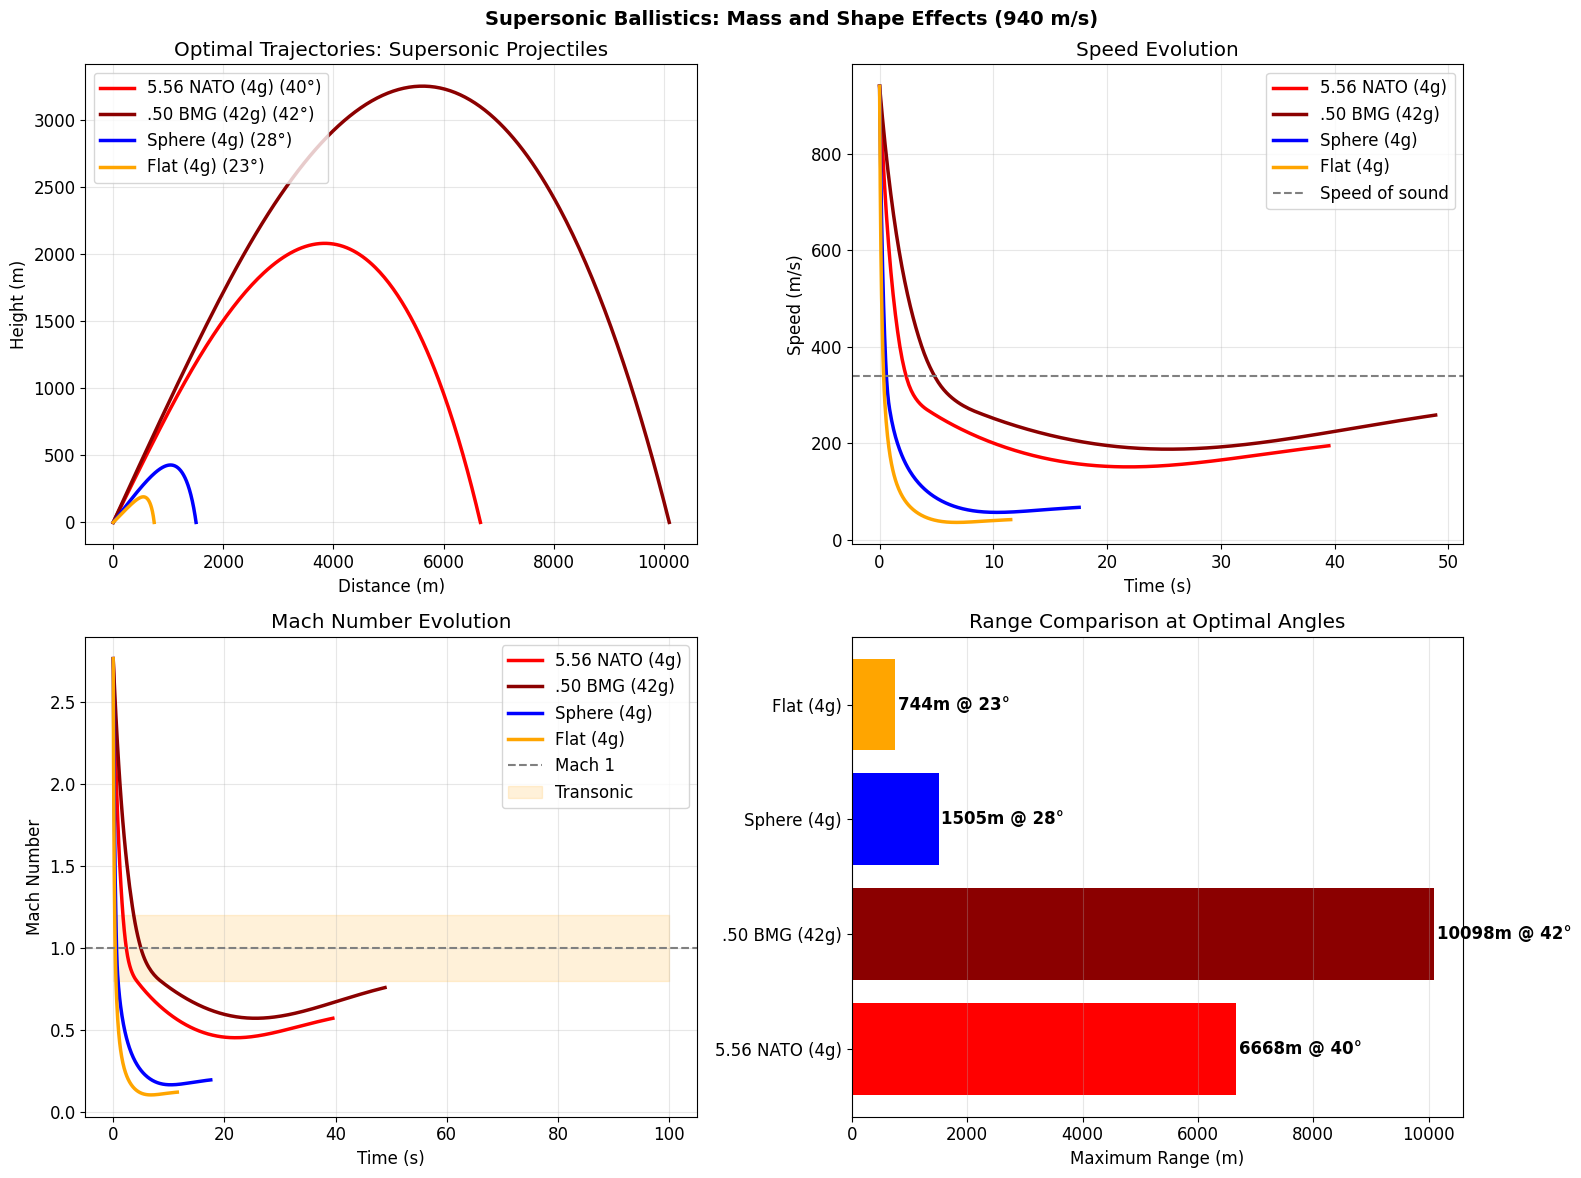

In [84]:
# Create comparison visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
colors = ["red", "darkred", "blue", "orange"]

# Get full trajectory data for optimal angles
trajs = {}
for i, (name, proj) in enumerate(supersonic_projectiles.items()):
    trajs[name] = projectile_distance_supersonic(
        BULLET_SPEED,
        optimal_data[name]["angle"],
        proj["mass"],
        proj["area"],
        proj["shape"],
        altitude_model=True,
        return_trajectory=True,
        n_points=200,
    )

# Plot 1: Trajectories at optimal angles
for i, name in enumerate(supersonic_projectiles.keys()):
    t = trajs[name]
    ax1.plot(
        t["x"],
        t["y"],
        linewidth=2.5,
        color=colors[i],
        label=f"{supersonic_projectiles[name]['desc']} ({optimal_data[name]['angle']}°)",
    )
ax1.set_xlabel("Distance (m)")
ax1.set_ylabel("Height (m)")
ax1.set_title("Optimal Trajectories: Supersonic Projectiles")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Speed vs time
for i, name in enumerate(supersonic_projectiles.keys()):
    ax2.plot(
        trajs[name]["t"],
        trajs[name]["speed"],
        linewidth=2.5,
        color=colors[i],
        label=supersonic_projectiles[name]["desc"],
    )
ax2.axhline(340.3, color="gray", linestyle="--", label="Speed of sound")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Speed (m/s)")
ax2.set_title("Speed Evolution")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Mach number evolution
for i, name in enumerate(supersonic_projectiles.keys()):
    ax3.plot(
        trajs[name]["t"],
        trajs[name]["mach"],
        linewidth=2.5,
        color=colors[i],
        label=supersonic_projectiles[name]["desc"],
    )
ax3.axhline(1.0, color="gray", linestyle="--", label="Mach 1")
ax3.fill_between([0, 100], 0.8, 1.2, alpha=0.15, color="orange", label="Transonic")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Mach Number")
ax3.set_title("Mach Number Evolution")
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Range comparison bar chart
names_list = [p["desc"] for p in supersonic_projectiles.values()]
ranges_list = [optimal_data[n]["range"] for n in supersonic_projectiles.keys()]
angles_list = [optimal_data[n]["angle"] for n in supersonic_projectiles.keys()]

bars = ax4.barh(names_list, ranges_list, color=colors)
ax4.set_xlabel("Maximum Range (m)")
ax4.set_title("Range Comparison at Optimal Angles")
ax4.grid(True, alpha=0.3, axis="x")
for i, (bar, r, a) in enumerate(zip(bars, ranges_list, angles_list)):
    ax4.text(r + 50, i, f"{r:.0f}m @ {a}°", va="center", fontweight="bold")

plt.suptitle(
    "Supersonic Ballistics: Mass and Shape Effects (940 m/s)",
    fontsize=14,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

## Key Findings: Supersonic Ballistics

### Mass Effect
- **Heavier bullets achieve longer ranges**: The .50 BMG (42g) significantly outperforms the 5.56 (4g)
- Higher mass = better momentum retention against drag

### Shape Effect  
- **Streamlined shapes are critical**: Bullets dramatically outperform spheres and blunt objects
- Poor aerodynamics can reduce range by 50-80% at supersonic speeds
- Wave drag (shock waves) dominates at these velocities

### Optimal Angles
- All supersonic projectiles have optimal angles well below 45° (typically 25-35°)
- Higher drag projectiles favor even lower angles to minimize flight time
- The optimal angle shifts lower as drag increases

### Energy Loss
- Supersonic projectiles lose 30-70% of kinetic energy to drag
- Transonic regime (Mach 0.8-1.2) causes the most rapid deceleration
- Streamlined shapes retain significantly more energy